<a href="https://colab.research.google.com/github/ravi-gopalan/lstm_analyses/blob/master/lstm_prediction_WDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [209]:
!ls

sample_data  WDC.csv


In [215]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('WDC.csv', parse_dates=['Date'], date_parser=dateparse)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 7 columns):
Date         2266 non-null datetime64[ns]
Open         2266 non-null float64
High         2266 non-null float64
Low          2266 non-null float64
Close        2266 non-null float64
Adj Close    2266 non-null float64
Volume       2266 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 124.0 KB


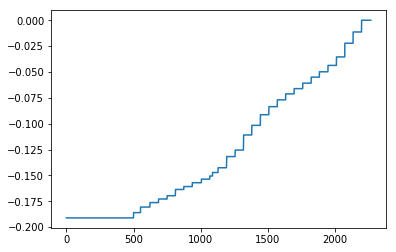

In [216]:
plt.plot((df['Adj Close']-df['Close'])/df['Close'])

In [217]:
df.head()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-04,28.129999,28.350000,27.580000,27.969999,22.624254,3916600
1,2010-10-05,28.309999,28.850000,27.930000,28.780001,23.279446,4916600
2,2010-10-06,28.629999,28.910000,27.709999,27.900000,22.567631,7194900
3,2010-10-07,28.010000,28.500000,27.410000,28.350000,22.931625,6079100
4,2010-10-08,28.830000,29.299999,28.600000,28.900000,23.376511,7276000


,Date,Open,High,Low,Close,Adj Close,Volume
2261,2019-09-27,61.439999,62.500000,60.180000,60.490002,60.490002,5759500
2262,2019-09-30,60.340000,60.439999,58.830002,59.639999,59.639999,3799400
2263,2019-10-01,60.060001,61.110001,58.369999,58.590000,58.590000,3177100
2264,2019-10-02,57.810001,57.939999,56.150002,56.820000,56.820000,5590700
2265,2019-10-03,56.570000,57.814999,55.480000,57.779999,57.779999,3463535


In [218]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-04,28.129999,28.350000,27.580000,27.969999,22.624254,3916600
2010-10-05,28.309999,28.850000,27.930000,28.780001,23.279446,4916600
2010-10-06,28.629999,28.910000,27.709999,27.900000,22.567631,7194900
2010-10-07,28.010000,28.500000,27.410000,28.350000,22.931625,6079100
2010-10-08,28.830000,29.299999,28.600000,28.900000,23.376511,7276000


In [219]:
df.drop(columns=['Adj Close'],inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-10-04,28.129999,28.350000,27.580000,27.969999,3916600
2010-10-05,28.309999,28.850000,27.930000,28.780001,4916600
2010-10-06,28.629999,28.910000,27.709999,27.900000,7194900
2010-10-07,28.010000,28.500000,27.410000,28.350000,6079100
2010-10-08,28.830000,29.299999,28.600000,28.900000,7276000


In [220]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['Open'].rolling(window).mean()
rolling_std = df['Open'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
df.head()
df.tail()

,Open,High,Low,Close,Volume,Rolling Mean,Bollinger High,Bollinger Low
Date,,,,,,,,
2010-10-04,28.129999,28.350000,27.580000,27.969999,3916600,NaN,NaN,NaN
2010-10-05,28.309999,28.850000,27.930000,28.780001,4916600,NaN,NaN,NaN
2010-10-06,28.629999,28.910000,27.709999,27.900000,7194900,NaN,NaN,NaN
2010-10-07,28.010000,28.500000,27.410000,28.350000,6079100,NaN,NaN,NaN
2010-10-08,28.830000,29.299999,28.600000,28.900000,7276000,NaN,NaN,NaN


,Open,High,Low,Close,Volume,Rolling Mean,Bollinger High,Bollinger Low
Date,,,,,,,,
2019-09-27,61.439999,62.500000,60.180000,60.490002,5759500,61.275238,66.955879,55.594596
2019-09-30,60.340000,60.439999,58.830002,59.639999,3799400,61.558095,66.317802,56.798387
2019-10-01,60.060001,61.110001,58.369999,58.590000,3177100,61.770952,65.744583,57.797320
2019-10-02,57.810001,57.939999,56.150002,56.820000,5590700,61.827142,65.518814,58.135471
2019-10-03,56.570000,57.814999,55.480000,57.779999,3463535,61.718095,65.882853,57.553336


In [221]:
df.iloc[2074,:]

Open              3.804000e+01
High              3.809000e+01
Low               3.582000e+01
Close             3.697000e+01
Volume            6.960500e+06
Rolling Mean      4.046000e+01
Bollinger High    4.803532e+01
Bollinger Low     3.288468e+01
Name: 2018-12-31 00:00:00, dtype: float64

In [222]:
df.iloc[2114,:]

Open              4.815000e+01
High              5.052000e+01
Low               4.666000e+01
Close             5.030000e+01
Volume            1.105930e+07
Rolling Mean      4.748524e+01
Bollinger High    5.178234e+01
Bollinger Low     4.318813e+01
Name: 2019-02-28 00:00:00, dtype: float64

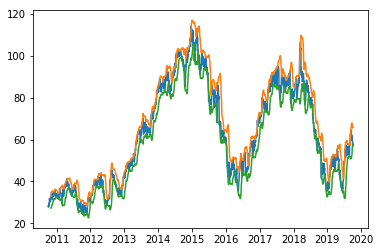

In [224]:
sns.lineplot(data=df['Close'])
sns.lineplot(data=df['Bollinger High'])
sns.lineplot(data=df['Bollinger Low'])

In [225]:
close_array = df.values
close_array.shape
close_array[:2]

(2266, 8)

array([[2.8129999e+01, 2.8350000e+01, 2.7580000e+01, 2.7969999e+01,
        3.9166000e+06,           nan,           nan,           nan],
       [2.8309999e+01, 2.8850000e+01, 2.7930000e+01, 2.8780001e+01,
        4.9166000e+06,           nan,           nan,           nan]])

In [280]:
train_array = close_array[:-192,:5]
train_array.shape

(2074, 5)

In [282]:
valid_array = close_array[train_array.shape[0]:train_array.shape[0]+40,:5]
valid_array.shape

(40, 5)

In [228]:
train_array[0]

array([2.8129999e+01, 2.8350000e+01, 2.7580000e+01, 2.7969999e+01,
       3.9166000e+06,           nan,           nan,           nan])

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler


sc1 = MinMaxScaler((0, 1))
sc2 = MinMaxScaler((0, 1))
sc3 = MinMaxScaler((0, 1))
sc4 = MinMaxScaler((0, 1))
sc5 = MinMaxScaler((0, 1))

scale1 = sc1.fit_transform(train_array[:,0].reshape(-1, 1))
scale2 = sc2.fit_transform(train_array[:,1].reshape(-1, 1))
scale3 = sc3.fit_transform(train_array[:,2].reshape(-1, 1))
scale4 = sc4.fit_transform(train_array[:,3].reshape(-1, 1))
scale5 = sc5.fit_transform(train_array[:,4].reshape(-1, 1))


In [284]:
scaled_training_set = np.concatenate((scale1, scale2,scale3,scale4,scale5), axis=1)
scaled_training_set.shape

(2074, 5)

In [285]:
scaled_training_set[:,4]

array([0.11572156, 0.14992936, 0.22786499, ..., 0.23691979, 0.13272626,
       0.16269571])

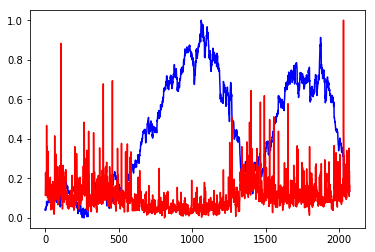

In [286]:
plt.plot(scaled_training_set[:,3],color='b',label='close')
plt.plot(scaled_training_set[:,4],color='r',label='volume')


In [0]:
# Creating a data structure with 120 timesteps and 1 output
timesteps=90
X_train = []
y_train = []
for i in range(timesteps, train_array.shape[0]):
    X_train.append(scaled_training_set[i-timesteps:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [289]:
X_train.shape
y_train.shape

(1984, 90, 1)

(1984,)

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate=0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error')

In [293]:
epoch_trials = [50, 100]
batch_size_trials = [64]

reg_models = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size)
    reg_models.append(regressor)


Epoch 1/1
1984/1984 [==============================] - 47s 24ms/step - loss: 0.0246


Epoch 1/1
1984/1984 [==============================] - 20s 10ms/step - loss: 0.0067


Epoch 1/5
1984/1984 [==============================] - 40s 20ms/step - loss: 0.0079
Epoch 2/5
1984/1984 [==============================] - 39s 20ms/step - loss: 0.0049
Epoch 3/5
1984/1984 [==============================] - 40s 20ms/step - loss: 0.0043
Epoch 4/5
1984/1984 [==============================] - 41s 21ms/step - loss: 0.0045
Epoch 5/5
1984/1984 [==============================] - 40s 20ms/step - loss: 0.0035


Epoch 1/5
1984/1984 [==============================] - 20s 10ms/step - loss: 0.0032
Epoch 2/5
1984/1984 [==============================] - 20s 10ms/step - loss: 0.0031
Epoch 3/5
1984/1984 [==============================] - 20s 10ms/step - loss: 0.0022
Epoch 4/5
1984/1984 [==============================] - 20s 10ms/step - loss: 0.0026
Epoch 5/5
1984/1984 [==============================] - 20s 10ms/step - loss: 0.0023


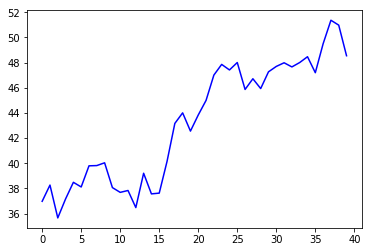

In [108]:
plt.plot(valid_array[:,3],color='b',label='valid-close')

In [294]:
inputs_array = close_array[train_array.shape[0]-timesteps:train_array.shape[0]+40]
inputs_array.shape

(130, 8)

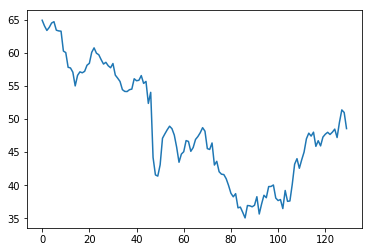

In [295]:
plt.plot(inputs_array[:,3])

In [296]:
X_test = []
for i in range(timesteps, timesteps+40):
    X_test.append(inputs_array[i-timesteps:i,0])
X_test = np.array(X_test)
X_test.shape

(40, 90)

In [297]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(40, 90, 1)

In [274]:
X_train.shape

(1984, 90, 1)

In [0]:
scaled_preds = []
prices = []
for reg_model in reg_models:
  scaled_preds.append(reg_model.predict(X_test))
  prices.append(sc1.inverse_transform(reg_model.predict(X_test)))



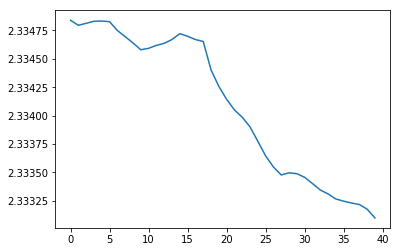

In [301]:
plt.plot(scaled_preds[3])

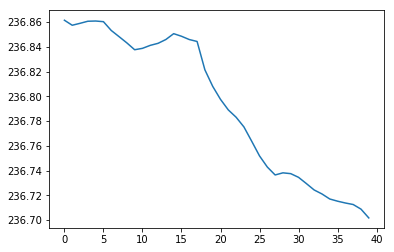

In [302]:
plt.plot(prices[3])

In [205]:
valid_array[:,0]

array([38.040001, 36.150002, 37.      , 36.599998, 37.32    , 39.259998,
       38.360001, 39.52    , 39.560001, 37.889999, 38.060001, 37.82    ,
       37.25    , 36.549999, 38.970001, 37.93    , 38.669998, 45.5     ,
       42.029999, 44.      , 43.169998, 43.810001, 44.73    , 47.060001,
       47.439999, 47.419998, 47.290001, 44.450001, 46.779999, 46.459999,
       48.68    , 47.560001, 48.459999, 48.419998, 47.950001, 48.380001,
       48.060001, 50.900002, 51.189999, 50.830002])

Text(0.5, 1.0, 'WDC Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'WDC Stock Price')

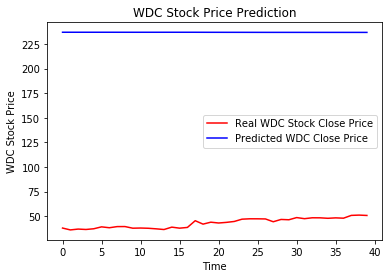

In [303]:
# Visualising the results
plt.plot(valid_array[:,0], color = 'red', label = 'Real WDC Stock Close Price')
plt.plot(prices[0], color = 'blue', label = 'Predicted WDC Close Price')
plt.title('WDC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('WDC Stock Price')
plt.legend()
plt.show()